In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#data loading
iris = pd.read_csv("iris.csv")

#view first five rows
iris.head()


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
#view last five rows
iris.tail()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica

In [4]:
#view total number of rows and features
iris.shape

(150, 6)

In [5]:
#view total number of columns
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [6]:
#Check the null value
iris.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#check memory allocation and null value
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#Droping unwanted column

iris=iris.drop(['Id'], axis=1)

# Exploratory data analysis

In [9]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

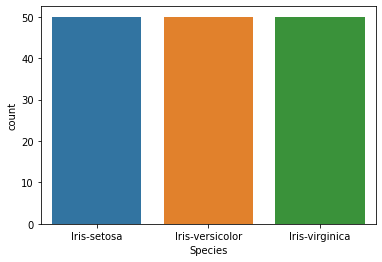

In [10]:
sns.countplot(iris["Species"])

observation
-----------------
It looks like dataset is balanced because all the three class labels are equal in this dataset.

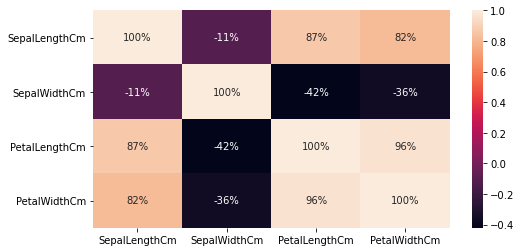

In [11]:
#draws  heatmap with input as the correlation matrix calculted by(df.corr())

plt.figure(figsize=(8,4)) 
sns.heatmap(iris.corr(),annot=True,fmt=".0%") 
plt.show()

observation
-----------------

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated.

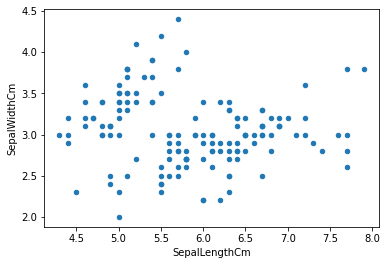

In [12]:
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm') ;
plt.show()

observation
-----------------
Cannot make any sense from this plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


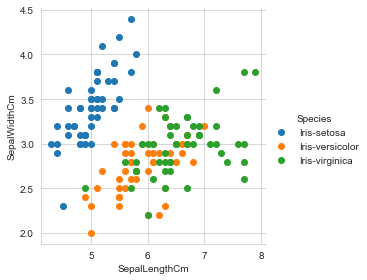

In [13]:
# 2-D Scatter plot with color-coding for each flower type/class.
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

observation
-----------------
Blue dots are easily identified as they are separated from the other two.
But orange and green are over-laped with each other, hence these two cannot be identified properly.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


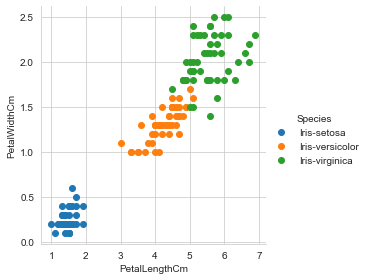

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();
plt.show();

observation
-----------------
Now we can identify that all the three dots are separated from each other.

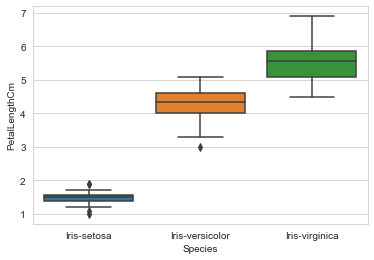

In [15]:
sns.boxplot(x='Species',y='PetalLengthCm', data=iris)
plt.show()

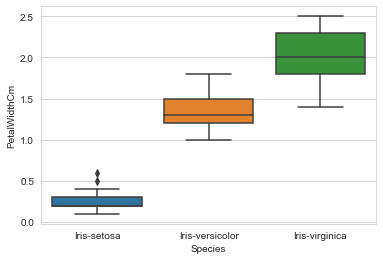

In [16]:
sns.boxplot(x='Species',y='PetalWidthCm', data=iris)
plt.show()

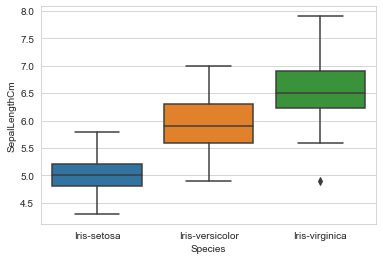

In [17]:
sns.boxplot(x='Species',y='SepalLengthCm', data=iris)
plt.show()

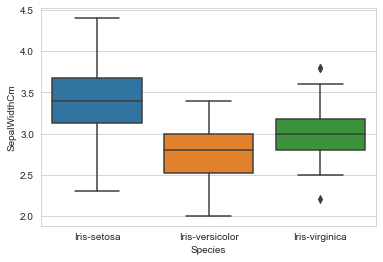

In [18]:
sns.boxplot(x='Species',y='SepalWidthCm', data=iris)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


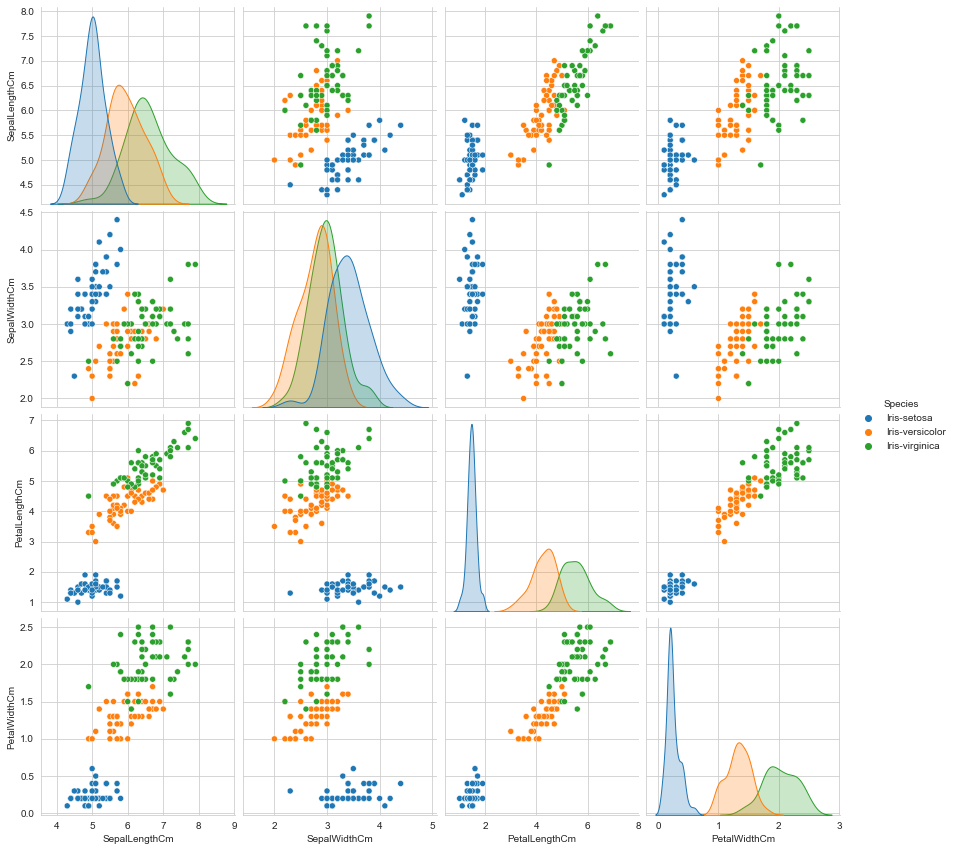

In [19]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="Species", size=3);
plt.show()

observation
-----------------
Based on this observation we can conclude that after training the model Iris-setosa (blue dot) probably classified properly.
And  rest of the two that is Iris-versicolor (orange dot) and Iris-virginica (green dot) can be mis-classified after the model building.

## Model

In [20]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()

# Encode labels in column 'Species'.
iris['Species']= label_encoder.fit_transform(iris['Species'])

iris['Species'].unique()

array([0, 1, 2])

In [21]:
#Setting variables
X = iris.iloc[:,0:4]
y = iris.iloc[:,4]


In [22]:
from sklearn.model_selection import train_test_split

#Dividing the data into Training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [23]:
X_train.shape,y_train.shape

((120, 4), (120,))

In [24]:
X_test.shape,y_test.shape,

((30, 4), (30,))

In [25]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
prediction=log.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

1.0

In [27]:
from sklearn.metrics import confusion_matrix
C_matrix=confusion_matrix(y_test , prediction)
C_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

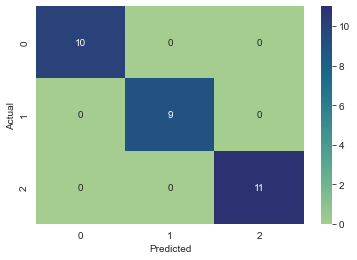

In [28]:
cm_df = pd.DataFrame(C_matrix, columns=np.unique(y_test), index = np.unique(y_test))
cm_df.index.name = 'Actual'
cm_df.columns.name= 'Predicted'
sns.heatmap(cm_df, cmap = "crest", annot=True) ;

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini')
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
prediction=dt_clf.predict(X_test)

In [31]:
accuracy_score(y_test, prediction)

1.0

In [32]:
C_matrix=confusion_matrix(y_test , prediction)
C_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

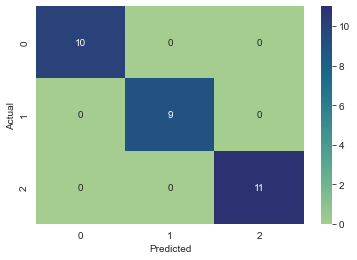

In [33]:
cm_df = pd.DataFrame(C_matrix, columns=np.unique(y_test), index = np.unique(y_test))
cm_df.index.name = 'Actual'
cm_df.columns.name= 'Predicted'
sns.heatmap(cm_df, cmap = "crest", annot=True) ;

Conclusion
----------------

As per my output, I consider that any of the models as my final model for this problem.